In [1]:
import numpy as np
import pandas as pd
import VectorClass as vc
import math

Vector1 = vc.Vector(1, 5, 20)
#Vector1 = vc.Vector(0, 0, -2, 'cartesian')
print(Vector1)
print(Vector1.cartesian())
print(Vector1.azi())



(1, 5, 20)
[0.34071865342161006, 0.029809019626209157, 0.9396926207859084]
70.00000000000001


In [13]:
Vector2 = vc.Vector(20, 6, 30)
Vector2.phi()

30

Figuring out angles between vectors.

The way I know how to do it is using cartesian co-ordinates and then finding the dot product!

1. $cos(\theta) = \frac{\bold a \cdot \bold b}{|| \bold a |||| \bold b ||}$

But to use Equation 1), we need to convert from spherical coordinates to cartesian (if we defined our vector with spherical coordinates).
To do this we use the defining relations for the which is...

$x = rcos(\theta)cos(\phi)$, $y = rsin(\theta)cos(\phi)$, and $z = rsin(\phi)$

This is using $\theta$ to represent the polar angle from the postive $x$-axis, and $\phi$ to represent the positive(actually negative) azimuthal angle from the postive $x$-axis (CCW is passive convention for postiive rotation direction)

#----------------------------------------------------------------------------------This has now been changed to be more intuitive!----------------------------------------------------------------------------------#

$x = rcos(\theta)sin(\phi)$, $y = rsin(\theta)sin(\phi)$, and $z = rcos(\phi)$

Using $\theta$ to represent the polar angle from the postive $x$-axis, and $\phi$ to represent the positive azimuthal angle from the postive $z$-axis (CCW is passive convention for postiive rotation direction)

In [ ]:
x = Vector1.magnitude() * math.cos(math.radians(Vector1.theta())) * math.sin(math.radians(Vector1.phi())) #Python math package uses radians so a conversion from degrees to radians is required
y = Vector1.magnitude() * math.sin(math.radians(Vector1.theta())) * math.sin(math.radians(Vector1.phi()))
z = Vector1.magnitude() * math.cos(math.radians(Vector1.phi()))
Vector1.cartesian()
Vector2.cartesian()
#x #Correct Values!

We can now find the angle between the vectors by applying Equation 1., and understanding the definition of the Dot Product and two norm of a vector...

2. $\bold a \cdot \bold b = (a_x \times b_x) + (a_y \times b_y) + (a_z \times b_z)$

3. $||\bold a || = \sqrt{{a_x}^2 + {a_y}^2 + {a_z}^2}$ 


In [ ]:
x2 = Vector2.magnitude() * math.cos(math.radians(Vector2.theta())) * math.sin(math.radians(Vector2.phi())) #Python math package uses radians so a conversion from degrees to radians is required
y2 = Vector2.magnitude() * math.sin(math.radians(Vector2.theta())) * math.sin(math.radians(Vector2.phi()))
z2 = Vector2.magnitude() * math.cos(math.radians(Vector2.phi()))

nume = x*x2 + y*y2 + z*z2
deno = math.sqrt(x**2 + y**2 + z**2) * math.sqrt(x2**2 + y2**2 + z2**2)

angle = math.degrees(math.acos(nume/deno))

#angle = Vector1.angle(Vector2)
#angle
Vector1.angle(Vector2) #Correct again!

Rotation can be preformed on a vector using a series of rotational matrices. These come in a set of 3 and correlate to the turning motions of Pitch (about the $x$-axis), Roll (about the $y$-axis), and Yaw (about the $z$-axis).

This can quickly become quite complicated/tricky to co-ordinate and after some use of the matrices you will notice that the order of the same rotations e.g., Roll by $5 \degree$, Yaw by $10 \degree$, Pitch by $8 \degree$, is not the same as Yaw by $10 \degree$, Roll by $5 \degree$, and Pitch by $8 \degree$!

Therefore, an order convension hsa be established. Typically, the vector undergoing the rotation to match the fixed-reference vector will under go a transformation of Roll, Pitch then Yaw. But we run into a new problem, rotating in our cartesian co-ordinates is difficult as we cannot clearly tell how far we should rotate. We cannot simply 'Roll' until we reach the right $y$ or $z$ co-ords. Furthermore, we would have to calculate something called Euler Angles to make it much more intuitive. These are defined as Roll angle $\phi$, Pitch angle $\theta$, and Yaw angle $\psi$. !!! This raises another point that the current implemenation of the vectors, especially considering the Spherical Co-ordinates defining system, the established vectors are more accurately a position with respect to a true centre (0,0,0). The vectors currently do not have an form of storing their heading direction, where they point towards. It is currently assumed all of the vectors point at a $90 \degree$ to the Earth's (or any spherical entity) horizon !!!. Regardless, we can now apply our translations where our Roll, Pitch and Yaw angles are defined to be the difference between the two vectors (considering positive convension of CCW), and Roll until the angles match, then Pitch until they match and finally Yaw until they match. We can use our Spherical Angles to figure out the Pitch and Yaw angle (the Roll angle is always assumed to be 0!).

The Euler Rotational Matrices are given by the Series of Equations...

$ Roll \equiv \bold R_x = \begin{bmatrix} 1 & 0 & 0 \\ 0 & cos(\theta) & -sin(\theta) \\ 0 & sin(\theta) & cos(\theta) \end{bmatrix}$, 
$ Pitch \equiv \bold R_y = \begin{bmatrix} cos(\theta) & 0 & sin(\theta) \\ 0 & 1 & 0 \\ -sin(\theta) & 0 & cos(\theta) \end{bmatrix}$, and 
$ Yaw \equiv \bold R_z = \begin{bmatrix} cos(\theta) & -sin(\theta) & 0 \\ sin(\theta) & cos(\theta) & 0 \\ 0 & 0 & 1 \end{bmatrix}$

In [ ]:
Vector3 = Vector1.rotate_euler(0, 45, 50)
Vector3_2 = Vector1.rotate_euler(0, 50, 45)

NameError: name 'Vector3' is not defined

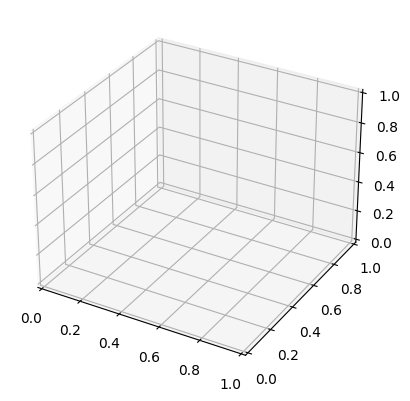

In [15]:
import matplotlib.pyplot as plt

ax = plt.figure().add_subplot(projection='3d')
#X = np.array([x, x2])
#Y = np.array([y, y2])
#Z = np.array([z, z2])
#Ori = np.array([0, 0])
x3, y3, z3 = Vector3.cartesian()
x3_2, y3_2, z3_2 = Vector3_2.cartesian()
#ax.quiver(0, 0, 0, x, y, z)
#ax.quiver(0, 0, 0, x2, y2, z2)
ax.quiver(0, 0, 0, 0, 0, 1, color='red')
ax.quiver(0, 0, 0, x3, y3, z3)
ax.quiver(0, 0, 0, x3_2, y3_2, z3_2, color='green')
plt.show()

In [16]:
def plot(pArray, pAx):
    colours = ["red", "green", "blue"]
    i = 0
    for row in pArray:
        #ax.cls()
        #print(row)
        pAx.quiver(row[0], row[1], row[2], row[3], row[4], row[5], color=colours[i%3])
        i += 1
    return 0

Vectors = np.array([[0, 0, 0, 0, 0, 1], [0, 0, 0] + Vector1.cartesian(), [0, 0, 0] + Vector3.cartesian()])
ax = plt.figure().add_subplot(projection='3d')
plot(Vectors, ax)
ax.legend(["North Pole", "Vector1", "Vector3"])
plt.show()

NameError: name 'Vector3' is not defined

Rotating a vector to become parrallel with another vector is not a simple task. This is because, using the 3 matrices defined prior for Roll, Pitch and Yaw, there are too many unknowns leading to infinite amount of soluions! What we can find out is the final form of the total Rotational matrix, the final matrix after calculating the product of the matrices. We can do this by making use of both the Scalar/Dot product and Vector/Cross product.

The Scalar product, order does not matter, will provide us the angle between vectors as shown before.

The Cross product, where order is important, will provide us a vector 'Normal' to the 'evaluated plane' in which both vectors reside in. This is the same plane we measured the angle in and is just a 2D representation of the two vectors in space! This normal is important as the direction it points dictates the direction of a postive turning angle. The convention of order for rotating vectors is: Vector 1 $\times$ Vector 2, where the Vector 1 is the vector in question to be rotated, by angle $\theta$.

The Cross product is found by...

4. $\bold a \times \bold b = \begin{vmatrix} \bold i & \bold j & \bold k \\ a_x & a_y & a_z \\ b_x & b_y & b_z \end{vmatrix} \equiv \bold i (a_y b_z - b_y a_z) - \bold j (a_x b_z - b_x a_z) + \bold k (a_x b_y - b_x a_y)$

Where, $\bold i$, $\bold j$ and $\bold k$ are Unit Vectors in the positive $x$, $y$ and $z$-axis directions respectively. They are defined as...

$\bold i = \begin{pmatrix} 1 \\ 0 \\ 0 \end{pmatrix}$, $\bold j = \begin{pmatrix} 0 \\ 1 \\ 0 \end{pmatrix}$, and $\bold k = \begin{pmatrix} 0 \\ 0 \\ 1 \end{pmatrix}$

We require this normal vector to be normalised. This means its overall magnitude is of unit length. This is done by...

5. $\bold n = \frac{\bold a \times \bold b} {||\bold a \times \bold b||}$

Now rotation about this Unit Normal, or more generally about a vector (which must be unit length) can be found by...

6. $\bold R_{zy^{'}x^{''}} = \begin{bmatrix} cos\theta + n_x^2 (1-cos\theta) & n_x n_y (1-cos\theta) - n_z sin\theta & n_x n_z(1-cos\theta) + n_y sin\theta \\ n_x n_y(1-cos\theta) + n_z sin\theta & cos\theta + n_y^2 (1-cos\theta) & n_y n_z (1-cos\theta) - n_x sin\theta \\ n_x n_z (1-cos\theta) - n_y sin\theta & n_y n_z(1-cos\theta) + n_x sin\theta & cos\theta + n_z^2 (1-cos\theta) \end{bmatrix}$

I have not learnt the derrivation of this yet! It is quite lengthy and confusing

The individual Euler angles to preform this rotation can be found by the series (the arctans should be replaced with atan2 check https://en.wikipedia.org/wiki/Atan2)

7. $\phi = arctan(\frac{R_{32}} {R_{33}})$, $\theta = arcsin(-R_{31})$, and $\psi = arctan(\frac{R_{21}} {R_{11}})$, from https://en.wikipedia.org/wiki/Rotation_formalisms_in_three_dimensions

Usually, for engineering and robotics problems, a rotation of z-x-z is usually used instead of the z-y-x. For now z-y-x will be used, but this can and probably should change.

[0.0, 0.0, 1.0]
[0.5000000000000001, -0.8660254037844386, 6.123233995736766e-17]
[[ 0.7803325  -0.12682509 -0.61237522]
 [-0.12682509  0.9267775  -0.353555  ]
 [ 0.61237522  0.353555    0.70711   ]]
[0.0, 0.0, 1.0]
[-0.0, 0.0, 1.0]


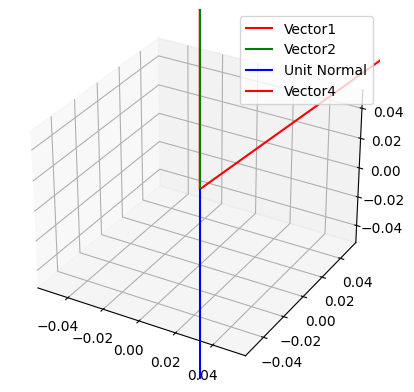

In [21]:
#Vector1.set_phi(90)
#Vector1.set_theta(0)
Vector1.set_magnitude(1)
Vector1.set_phi(45)
Vector1.set_theta(30)

Vector2.set_magnitude(1)
Vector2.set_phi(0)
Vector2.set_theta(0)

print(Vector2.cartesian())

Normal = Vector1.cross(Vector2)
#U_Normal = list(np.around(Normal.unit().cartesian(), 5))
U_Normal = Normal.unit().cartesian()
print(U_Normal)
angle = Vector1.angle(Vector2)
alpha = math.radians(angle)
ca = round(math.cos(alpha), 5)
sa = round(math.sin(alpha), 5)

R_zyx = np.array([[ca + U_Normal[0]**2 * (1 - ca), U_Normal[0] * U_Normal[1] * (1 - ca) - U_Normal[2] * sa, U_Normal[0] * U_Normal[2] * (1 - ca) + U_Normal[1] * sa], 
[U_Normal[0] * U_Normal[1] * (1 - ca) + U_Normal[2] * sa, ca + U_Normal[1]**2 * (1 - ca), U_Normal[1] * U_Normal[2] * (1 - ca) - U_Normal[0] * sa], 
[U_Normal[0] * U_Normal[2] * (1 - ca) - U_Normal[1] * sa, U_Normal[1] * U_Normal[2] * (1 - ca) + U_Normal[0] * sa, ca + U_Normal[2]**2 * (1 - ca)]])
print(R_zyx)

#print(R_zyx[0])
r_phi = math.atan2(R_zyx[2][1], R_zyx[2][2])
r_theta = math.asin(-R_zyx[2][0])
r_psi = math.atan2(R_zyx[1][0], R_zyx[0][0])

phi = math.degrees(r_phi)
theta = math.degrees(r_theta)
psi = math.degrees(r_psi)

Vector4 = Vector1.rotate_euler(phi, theta, psi)
print(Vector2.cartesian())
print(list(np.around(Vector4.cartesian(), 5)))

Vectors = np.array([[0, 0, 0] + Vector1.cartesian(), [0, 0, 0] + Vector2.cartesian(), [0, 0, 0] + U_Normal, [0, 0, 0] + Vector4.cartesian()])
ax = plt.figure().add_subplot(projection='3d')
plot(Vectors, ax)
ax.legend(["Vector1", "Vector2", "Unit Normal", "Vector4"])
plt.show()

Now this rotation is about a common axis of rotation. It might be fair to label this as the Global Earth Axis.

However, this is not always useful to us, espeically if we want to consider rotations realtive to a vector. For example how far would a vector need to rotate about its own centre of mass to align to a vector. This allows us to find values like angle deviation and understand alignment in more locally context.

First, we define a set of body-fixed axis where our x-axis is aligned with the pointing of the vector. Our y and z-axis exist on the plane that x is normal to. Just for intiutive reasons we will define the y and z axis to east and south pointing originally. This means a positive rotation about our y axis is a Pitch-up (nose up motion) and a positive rotation about z is a Yaw-Right (nose slice right).

It might be apparent but, our roll rotation is the only rotation that does not directly affect our vectors pointing direction. It only effects the orientation of our y and z axis. Hence, it will be important to store factors such as Roll angle, Pitch angle, and Yaw angle.


In [ ]:
def MatrixRot(axis, angle):
    #U_Normal = list(np.around(Normal.unit().cartesian(), 5))
    U_Normal = axis.unit().cartesian()
    alpha = math.radians(angle)
    ca = round(math.cos(alpha), 5)
    sa = round(math.sin(alpha), 5)

    R_zyx = np.matrix([[ca + U_Normal[0]**2 * (1 - ca), U_Normal[0] * U_Normal[1] * (1 - ca) - U_Normal[2] * sa, U_Normal[0] * U_Normal[2] * (1 - ca) + U_Normal[1] * sa], 
    [U_Normal[0] * U_Normal[1] * (1 - ca) + U_Normal[2] * sa, ca + U_Normal[1]**2 * (1 - ca), U_Normal[1] * U_Normal[2] * (1 - ca) - U_Normal[0] * sa], 
    [U_Normal[0] * U_Normal[2] * (1 - ca) - U_Normal[1] * sa, U_Normal[1] * U_Normal[2] * (1 - ca) + U_Normal[0] * sa, ca + U_Normal[2]**2 * (1 - ca)]])
    print(R_zyx)
    return R_zyx

def BodyAxis(axis):
    n = axis.unit().cartesian()
    if n[2] != 0:
        p_z = - (n[0] + n[1]) / n[2]
        y_axis = vc.Vector(1, 1, p_z, 'cartesian').unit()
    else:
        y_axis = vc.Vector(0, 0, 1, 'cartesian').unit()

    z_axis = axis.unit().cross(y_axis.unit())
    return y_axis, z_axis

def Transformation(newZ):
    #px = newX.unit()
    oldZ = vc.Vector(0, 0, 1, 'cartesian')
    angle = oldZ.angle(newZ)
    n = oldZ.cross(newZ).unit()
    return MatrixRot(n, angle)



Vector9 = vc.Vector(0, 1, -1, 'cartesian')
Body_Z = Vector9.unit()

R_t = Transformation(Body_Z)

#p_z = - (n[0] + n[1]) / n[2]
Body_X = vc.Vector(*np.array(R_t * np.vstack([1, 0, 0])), 'cartesian')
Body_Y = vc.Vector(*np.array(R_t * np.vstack([0, 1, 0])), 'cartesian')

#Body_Y, Body_Z = BodyAxis(Body_X)

Vectors = np.array([[0, 0, 0] + Body_X.cartesian(), [0, 0, 0] + Body_Y.cartesian(), [0, 0, 0] + Body_Z.cartesian()])
ax = plt.figure().add_subplot(projection='3d')
plot(Vectors, ax)
ax.legend(["Body_X", "Body_Y", "Body_Z"])
plt.show()

#Body_rX = MatrixRot(Body_X, 45)
#Body_rY = MatrixRot(Body_Y, 45)
#Body_rZ = MatrixRot(Body_Z, 45)

In [ ]:
Sat_Pos = vc.Vector(1000, 11, 22)
Sat_Point = -1 * Sat_Pos # Will always point to the centre of the Sphere (is an assumption for now)
R_t = Transformation(Sat_Point) # Will Find the transformation required to rotate the Earth x-axis to the satellite's pointing direction 
#Transformation will print the matrix (So will be the first output)
GS_Pos = vc.Vector(10, 10, 20)

absolute = 1 * (GS_Pos - Sat_Pos) #Dunno why this needs to be -1. Finds the Vector between Satellite and GS. Ideally should be Sat -> GS
print(Sat_Point.cartesian())
print(GS_Pos.cartesian())
print(absolute.cartesian())

relative = vc.Vector(*np.array(R_t * np.vstack(absolute.cartesian())), 'cartesian')#Produces Beam direction relative to Satellite frame of reference
print(relative.cartesian()) #As the x-axis should be pointing towards earth, the relative vector should naturally be positive in terms of x
print(relative) #This is why absolute needing to be negative doesn not make much sense

Beam_Point = vc.Vector(*[1, 0, 0], 'cartesian')

turn = Beam_Point.angle(relative)
norm = Beam_Point.cross(relative)

#rotMat = MatrixRot(norm, turn)

Vectors = np.array([GS_Pos.cartesian() + GS_Pos.cartesian(), Sat_Pos.cartesian() + Sat_Point.cartesian(), [0, 0, 0] + relative.cartesian()])
ax = plt.figure().add_subplot(projection='3d')
plot(Vectors, ax)
ax.legend(["GS", "Sat", "Relative"])
plt.show()

In [2]:
import VectorClass as vc

def rotate_to(Origin, Destination): #Provide Destination Vector to rotate to.
        Normal = Origin.cross(Destination)
        U_Normal = Normal.unit().cartesian() #Finding Unit Normal Vector
        angle = Origin.angle(Destination) #Postitive angle between Vectors
        alpha = math.radians(angle) #Convert to Radians
        ca = round(math.cos(alpha), 5) #Rounding is important to avoid weird issues when dividing.
        sa = round(math.sin(alpha), 5)

        R_zyx = np.array([[ca + U_Normal[0]**2 * (1 - ca), U_Normal[0] * U_Normal[1] * (1 - ca) - U_Normal[2] * sa, U_Normal[0] * U_Normal[2] * (1 - ca) + U_Normal[1] * sa], 
        [U_Normal[0] * U_Normal[1] * (1 - ca) + U_Normal[2] * sa, ca + U_Normal[1]**2 * (1 - ca), U_Normal[1] * U_Normal[2] * (1 - ca) - U_Normal[0] * sa], 
        [U_Normal[0] * U_Normal[2] * (1 - ca) - U_Normal[1] * sa, U_Normal[1] * U_Normal[2] * (1 - ca) + U_Normal[0] * sa, ca + U_Normal[2]**2 * (1 - ca)]])

        r_phi = math.atan2(R_zyx[2][1], R_zyx[2][2])
        r_theta = math.asin(-R_zyx[2][0])
        r_psi = math.atan2(R_zyx[1][0], R_zyx[0][0])

        phi = math.degrees(r_phi)
        theta = math.degrees(r_theta)
        psi = math.degrees(r_psi)

        return phi, theta, psi



Sat_Pos = vc.Vector(1000, 11, 22)
Sat_Point = -1 * Sat_Pos

t_phi, t_theta, t_psi = rotate_to(Sat_Point, vc.Vector(1, 0, 0))

GS_Pos = vc.Vector(10, 10, 20)

Beam_Direction = GS_Pos - Sat_Pos

print(Sat_Point.cartesian())
print(Beam_Direction.cartesian())

referenceVect = Beam_Direction.rotate_euler(t_phi, t_theta, t_psi)
print(referenceVect)
print(Sat_Point.rotate_euler(t_phi, t_theta, t_psi))

print(Sat_Pos.rotate_to(vc.Vector(1, 0, 0)))
print(Sat_Pos)

[-367.7240151957859, -71.47830775111996, -927.1838545667874]
[-364.35577430745144, -70.8843960049812, -917.7869283589282]
(990.0063503506883, 191.00495580121387, 135.97956139924943)
(999.9999999999999, 190.99998462301934, 135.99978724889598)
(1000.0, 193.87428800525572, 0.0002130190943304299)
(1000, 11, 22)


In [24]:
#Figuring out projections!
#Continuing off the section before

referenceY = vc.Vector(0, 1, 0, 'cartesian').rotate_euler(t_phi, t_theta, t_psi)

to_North = vc.Vector(4, 3, 5, 'cartesian').unit()

plane_Normal = Sat_Point.unit()

ref_theta = plane_Normal.angle(to_North)

projected_North = ( 1 - abs(math.cos(math.radians(ref_theta))) ) * to_North

ans_theta = referenceY.angle(projected_North)

print(referenceY)
print(to_North)

print(ans_theta)
#assume the true north vector is provided !




(1.0, 90.78345695732874, 94.09894899003697)
(1.0, 36.86989764584402, 45.0)
68.59975362003935
